In [5]:
import torch
import matplotlib.pyplot as plt
from deeprecon.torch.projector import projector2d
from deeprecon.torch.utils.phantom import phantom

In [6]:
x = phantom()
x = torch.from_numpy(x).to(torch.float32).to("cuda")
x = x[None, None, ...]
projector = projector2d(256, 256, 1, 2, 500, 1000, scan_type="flat")
projector.to("cuda")
views = torch.arange(256) * torch.pi * 2 / 256
views = views.to("cuda")

In [7]:
p = projector.projection(x, views)
b = projector.backprojection(p, views)
recon = projector.filtered_backprojection(p, views)

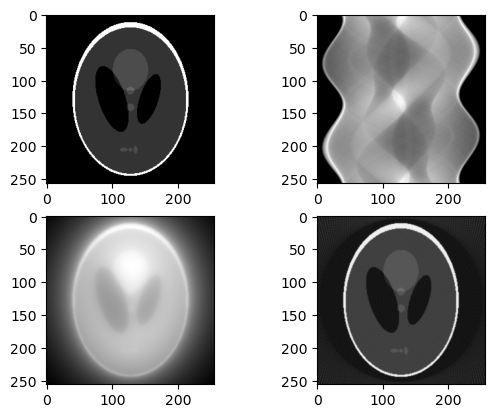

In [8]:
plt.figure()
plt.subplot(2,2,1)
plt.imshow(x.cpu().numpy().squeeze(), cmap="gray")
plt.subplot(2,2,2)
plt.imshow(p.cpu().numpy().squeeze(), cmap="gray")
plt.subplot(2,2,3)
plt.imshow(b.cpu().numpy().squeeze(), cmap="gray")
plt.subplot(2,2,4)
plt.imshow(recon.cpu().numpy().squeeze(), cmap="gray")
plt.show()